# Clojure Overture - Main Tutorial

This tutorial is intended as a tour through the fundamentals of
Clojure and the features that distinguish it from other languages.

Thanks to [ClojureBridge](http://clojurebridge.github.io/curriculum),
[Clojure for the Brave and
True](https://www.braveclojure.com/clojure-for-the-brave-and-true/),
and [ClojureDocs](https://clojuredocs.org) for inspiring the content.



This tutorial broken into the following sections:

1. [Language Basics](#Language-Basics)
2. [Functional Programming](#Functional-Programming)
3. [Data Processing](#Data-Processing)
4. [Concurrency](#Concurrency)
5. [Lisp](#Lisp)
6. [JVM Hosted](#JVM-Hosted)
7. [Polymorphism](#Polymorphism)
8. [Building a Project](#Building-a-Project)
9. [Web Development](#Web-Development)

## Language Basics

In [1]:
(println "Hello World")

Hello World


### Maths

In [2]:
;; Basic Maths (prefix notation)
(println (+ 3 4))
(println (- 3.14 1.1))
(println (* 3 4))
(println (/ 3 4)) ;; Rational
(println (/ 3 4.0)) ;; Float

7
2.04
12
3/4
0.75


In [3]:
;; Prefix notation removes precedence ambiguity
(+ (* 1 2) (* 3 4)) ;; vs. (1 * 2 + 3 * 4)

14

In [4]:
;; Prefix notation is more concise
(+ 1 2 3 4 5) ;; vs. 1 + 2 + 3 + 4 + 5

15

### Variables (spoiler: they don't vary)

In [5]:
;; Define a var 
(def age 42)

#'user/age

In [6]:
;; Let defines vars in a lexical scope (and returns the value of the last form)
(let [first-name "Fred"
      last-name "Dagg"]
  (str first-name " " last-name))

"Fred Dagg"

### Collections

#### Vectors

In [7]:
;; Vectors are array-backed sequences; most similar to a Python list
[1 2 3 4 5]

[1 2 3 4 5]

In [8]:
;; Basic sequence operations on a vector
(let [my-vector [1 2 3 4 5]]
  (println (count my-vector))
  (println (first my-vector))
  (println (rest my-vector)) ;; Returns a sequence
  (println (nth my-vector 1)))

5
1
(2 3 4 5)
2


In [9]:
;; Append to a vector with conj (returns a new vector)
(conj [1 2 3 4 5] 42)

[1 2 3 4 5 42]

In [10]:
;; Remove last item in a vector
(pop [1 2 3 4 5])

[1 2 3 4]

In [11]:
;; Concatenate Vectors
(concat [1 2] [3 4])

(1 2 3 4)

#### Maps

In [12]:
;; Same idea as a Python dictionary
{:first-name "Fred"
 :last-name "Dagg"}
;; Commas aren't needed, and are treated as whitespace in Clojure

{:first-name "Fred", :last-name "Dagg"}

In [13]:
(let [my-map {:first-name "Fred"}]
    ;; Associate a key
    (println (assoc my-map :last-name "Dagg"))
    ;; Disassociate a key
    (println (dissoc my-map :first-name)))

{:first-name Fred, :last-name Dagg}
{}


In [14]:
;; Keywords can act as functions to access values
(let [my-map {:first-name "Fred"}]
    (:first-name my-map))

"Fred"

In [15]:
;; Any value can be a key, but you need to use get to access values
(let [my-map {"first-name" "Fred"}]
    (get {"first-name" "Fred"} "first-name"))

"Fred"

In [16]:
(let [my-map {:first-name "Fred" :last-name "Dagg"}]
  ;; Get a sequence of keys or values
  (println (keys my-map))
  (println (vals my-map))
  ;; Converting to a vector (or using as a sequence) gives key/value pairs
  (println (vec my-map)))

(:first-name :last-name)
(Fred Dagg)
[[:first-name Fred] [:last-name Dagg]]


#### Other Collections

In [17]:
;; Lists (linked-list sequence, supports basically the same operations as a vector)
(let [my-list '(1 2 3 4 5)]
  ;; Conj/pop work at the front of a list (most efficient operation)
  (println (conj my-list 42))
  (println (pop my-list)))

(42 1 2 3 4 5)
(2 3 4 5)


In [18]:
;; Sets
(contains? #{1 2 3 4 5} 5)

true

### Flow Control

In [19]:
;; If/else statement (Note that if returns the value of the executed form)
(if (= true false) ;; Single equals for equality
  "True!"
  "False!")

"False!"

In [20]:
;; Use do to run multiple statements in a single "form" (usually only needed for side-effects)
;; do also returns the last value in the form
(if (and true (not (or false nil))) ;; false and nil are the only "falsey" values
  (do
    (println "True!")
    "truthy-return-value")
  (do
    (println "False!")
    "falsey-return-value"))

True!


"truthy-return-value"

In [21]:
;; Or use `when` to have an implicit do but no else expression
(when true
    (println "Hello")
    (println "World"))

Hello
World


In [22]:
;; cond is an alternative to if/elseif/else
(def n 42)
(cond (< n 0) "Negative"
      (> n 0) "Positive"
      :else "Zero")

"Positive"

### Functions

In [23]:
;; Define a function
(defn greeting
  "Docstring goes here..."
  [full-name]
  (str "Hello " full-name))

#'user/greeting

In [24]:
;; The value of the last form is the return value
(greeting "Fred Dagg")

"Hello Fred Dagg"

In [25]:
;; A function can support multiple signatures
(defn greeting
  ([first-name last-name]
    (greeting (str first-name " " last-name)))
  ([full-name]
    (str "Hello " full-name)))

(greeting "Fred" "Dagg")

"Hello Fred Dagg"

In [26]:
;; Functions can have variadic signatures
(defn greeting
  [& full-names]
  (doseq [full-name full-names]
    (println "Hello" full-name)))

(greeting "Fred Dagg" "Trev Dagg" "Bruce Bayliss")

Hello Fred Dagg
Hello Trev Dagg
Hello Bruce Bayliss


In [27]:
;; Functions can support keyword arguments
(defn greeting
  [full-name & {:keys [salutation]
                :or {salutation "Hello"}}]
  (str salutation " " full-name))

(greeting "Fred Dagg" :salutation "Gidday")

"Gidday Fred Dagg"

In [28]:
;; Anonymous functions
(let [add (fn [x y] (+ x y))
      square #(* % %)
      sub #(- %1 %2)]
  [(add 1 3)
   (square 4)
   (sub 3 1)])

[4 16 2]

In [29]:
;; Read docstrings
(println (:doc (meta (var +))))

Returns the sum of nums. (+) returns 0. Does not auto-promote
  longs, will throw on overflow. See also: +'


## Functional Programming

In [30]:
;; Immutable data structures require different ways of thinking
(defn double-values
  [values]
  (if (empty? values)
    '()
    (conj (double-values (rest values))
          (* 2 (first values)))))

(double-values [1 2 3 4 5])

(2 4 6 8 10)

In [31]:
;; Watch out for stack overflow...
(try
  (double-values (range 99999))
  (catch StackOverflowError ex "Woops..."))

"Woops..."

In [32]:
;; Use tail-recursion to avoid stack-overflow
(defn double-values-recursive
  ([values]
   (double-values-recursive values []))
  ([values new-values]
   (if (empty? values)
     new-values
     (recur (rest values) (conj new-values (* 2 (first values)))))))

(take 5 (double-values-recursive (range 99999)))

(0 2 4 6 8)

In [33]:
;; Tail-recursion with loop
(defn double-values-loop
  [values]
  (loop [values values
         new-values []]
    (if (empty? values)
      new-values
      (recur (rest values)
        (conj new-values (* 2 (first values)))))))

(take 5 (double-values-loop (range 99999)))

(0 2 4 6 8)

In [34]:
;; Higher-order functions are great for abstracting ideas
(defn alter-values
  [func values]
  (loop [values values
         new-values []]
    (if (empty? values)
      new-values
      (recur (rest values)
        (conj new-values (func (first values)))))))

(println (alter-values #(* 2 %) [1 2 3 4 5]))
(println (alter-values (partial * 2) [1 2 3 4 5]))
;; (`alter-values` is essentially `map`)

[2 4 6 8 10]
[2 4 6 8 10]


### Pure functions FTW!

Pure function: Takes an input; returns a value; has no other
"side-effects" (e.g. I/O, changing state).

I.E. Keep I/O operations in the highest functions. We'll see examples
later of where it is important for functions to be "pure".

## Data Processing

### Map/Filter/Reduce

In [35]:
(map #(* 2 %) [1 2 3 4 5])

(2 4 6 8 10)

In [36]:
(filter even? [1 2 3 4 5])

(2 4)

In [37]:
(reduce + [1 2 3 4 5])

15

In [38]:
;; Reduce can also take a starting value
(reduce #(str %1 " " %2) "The numbers are:" [1 2 3 4 5])

"The numbers are: 1 2 3 4 5"

In [39]:
;; Composing map/filter/reduce
(reduce + (map #(* 2 %) (filter even? (range 100))))

4900

In [40]:
;; Threading improves readability
(->> (range 100)
     (filter even?)
     (map #(* 2 %))
     (reduce +))

4900

In [41]:
(require '[clojure.string :as string])

;; Threading (-> ->> as->) is useful for all sorts of data transformations
(-> {:first-name "Fred" :last-name "Dagg"}
    :first-name
    (str " is the first name")
    string/upper-case)

"FRED IS THE FIRST NAME"

In [42]:
;; Threading to extend a map
(-> {}
    (assoc :first-name "Fred")
    (assoc :last-name "Dagg"))

{:first-name "Fred", :last-name "Dagg"}

In [43]:
;; List comprehensions are achieved with for
(for [x (range 4)
      y (range 4)
      :let [product (* x y)]
      :when (even? product)]
  [x y product])

([0 0 0] [0 1 0] [0 2 0] [0 3 0] [1 0 0] [1 2 2] [2 0 0] [2 1 2] [2 2 4] [2 3 6] [3 0 0] [3 2 6])

In [44]:
;; Destructuring is also useful for processing data structures
(->> {:first-name "Fred" :last-name "Dagg"}
     (map (fn [[k v]] (str k " has value " v))))

(":first-name has value Fred" ":last-name has value Dagg")

In [45]:
(require '[clojure.string :as string])

;; Destructuring a variable number of sequence items
(let [name "Fred Dagg Farming DIY"
      parts (string/split name #" ")
      [first-name last-name & interests] parts]
  (println first-name)
  (println last-name)
  (println interests))

Fred
Dagg
(Farming DIY)


In [46]:
;; A data-processing example

(require '[clojure.string :as string])

(defn text-stats
 [text]
 (let [words (string/split text #" ")]
   {:character-count (count text)
    :word-count (count words)
    :max-word-length (->> words
                          (map count)
                          (apply max))}))

(as-> (slurp "../LICENSE") $
  (string/split $ #"\n")
  (map text-stats $)
  (filter #(> (:character-count %) 50) $)
  (map :word-count $)
  (reduce + $))

5824

Clojure favours a small number of data types with many shared functions, rather than many data types with their own functions (e.g. OOP). So in the first instance, try to solve your problem using vectors and maps (i.e. Python lists and dictionaries). However, you can define records, which are like Python's named tuples, but act like maps.

In [47]:
(defrecord User [first-name last-name])

(def fred (User. "Fred" "Dagg"))

(println (:first-name fred))
(println (assoc fred :first-name "Trev"))
(println (map? fred))

Fred
#user.User{:first-name Trev, :last-name Dagg}
true


In [48]:
;; Protocols are like interfaces
(defprotocol Person
  (full-name [this]))

;; Extend a type (even Java classes!) to a protocol (even after definition!)
(extend-type User
  Person
  (full-name [this]
    (str (:first-name this) " " (:last-name this))))

(println (full-name fred))

;; Multimethods provide similar polymorphism but for non-type-based dispatch.

Fred Dagg


## Concurrency

In [49]:
(defn slow-func
  [arg]
  (Thread/sleep 100)
  arg)

(->> (range 10)
     (map slow-func)
     (doall)
     (time))

(->> (range 10)
     (pmap slow-func) ;; slow-func must be pure!
     (doall)
     (time))

"Elapsed time: 1001.232521 msecs"
"Elapsed time: 140.898892 msecs"


(0 1 2 3 4 5 6 7 8 9)

In [50]:
;; Futures run code asynchronously
(let [my-future (future
                  (Thread/sleep 1000)
                  "A value!")]
  ;; @ forces a future to be resolved before continuing evaluation.
  @my-future)

"A value!"

In [51]:
;; Promises are like futures that you resolve yourself
(let [my-promise (promise)]
  (deliver my-promise "A value!")
  @my-promise)

"A value!"

In [52]:
(defn search-hay
  [[idx item] result-promise]
  (Thread/sleep 100)
  (when (= item :needle)
    (deliver result-promise idx)))

(let [needle-promise (promise)
      haystack (-> (repeat 99 :hay)
                   (conj :needle)
                   (shuffle))
      search-futures (->> haystack
                          (map-indexed vector)
                          (map #(future (search-hay % needle-promise)))
                          (doall))]
   (println "Found needle at:" @needle-promise)
   (doseq [f search-futures]
     (future-cancel f)))

Found needle at: 80


If you want to control thread-pool size, see: https://github.com/TheClimateCorporation/claypoole

Clojure doesn't support mutable variables, but sometimes you need to
maintain a concept of changing system state, particularly when you
need to share state between multiple threads.

Clojure provides **reference types** that are mutable references to
immutable values (i.e. you never mutate a list, you just update the
reference to point to an updated copy of the list, but Clojure's
persistent data-structures makes this much more resource efficient
                  than it sounds).

An atom is a reference type that stores a value, and allows functions
to be applied to change the value. If two threads simultaneously
change the same atom, this will be detected, and one of the functions
will be re-applied on the value that was the result of the other
function. Because a function that changes the value may be applied
more than once, it MUST be pure.

In [53]:
(def my-counter (atom 0))
(println (str "Initial counter value: " @my-counter))

;; Call a watcher function whenever the atom is updated
(add-watch my-counter :my-watcher
  (fn [key atom old-state new-state]
    (println (str "New counter value: " new-state))))

;; Validate the state of an atom
(set-validator! my-counter #(<= % 2))

(swap! my-counter inc)
(swap! my-counter inc)
(try
  (swap! my-counter inc)
  (catch IllegalStateException ex (println "Woops...")))

Initial counter value: 0
New counter value: 1
New counter value: 2
Woops...


In [54]:
(let [counter (atom 0)]
  (->> (range 1000)
       ;; Increment in many different threads
       (map (fn [i] (future (swap! counter inc))))
       (doall)
       ;; Ensure all the futures are resolved
       (map deref)
       (doall))
  @counter)

1000

In [55]:
;; Using an atom as a memoizing "cache" (example from: https://clojure.org/reference/atoms)
(defn my-memoize [f]
  (let [mem (atom {})]
    (fn [& args]
      (if-let [e (find @mem args)]
        (val e)
        (let [ret (apply f args)]
          (swap! mem assoc args ret)
          ret)))))

(defn fib [n]
  (if (<= n 1)
    n
    (+ (fib (dec n)) (fib (- n 2)))))

(time (fib 35))

(def fib (my-memoize fib))

(time (fib 35))

"Elapsed time: 1238.04719 msecs"
"Elapsed time: 0.623617 msecs"


9227465

In [56]:
;; Refs can coordinate simultaneous updates to multiple
;; references in synchronised transactions (using STM).
(def balance1 (ref 100))
(def balance2 (ref 0))

(defn transfer
  [from to amount]
  (dosync
    (alter from #(- % amount))
    (alter to #(+ % amount))))

(->> (range 100)
     ;; Transfer $1 at a time in many different threads
     (map (fn [i] (future (transfer balance1 balance2 1))))
     (doall)
     ;; Ensure all the futures are resolved
     (map deref)
     (doall))

[@balance1 @balance2]

[0 100]

## Lisp

You may have noticed that the code we have been writing is made up of
the same data-structures as are supported. This is the property of
homoiconicity (code is data) that Clojure shares with the rest of the
Lisp family of languages.

To take advantage of this, Lisp's allow the definition of **macros**,
which can be thought of as functions that take the raw forms they are
passed as input instead of the values they evaluate to.

Macros allow the core of the language to be very small, as most
functionality can be achieved through macros.

Macros mean that library developers have almost as much power as the
language developers themselves. A great example of this is the
[core.async](https://github.com/clojure/core.async) library, which
provides co-routine syntax very similar to that of Go, or the
[Korma](http://sqlkorma.com/) library for building SQL queries in a
way that allows them to be manipulated like other data-structures.

It is worth noting however that macros do add complexity to the code,
and should really only be used as a last resort for achieving better
syntax. In general, a macro will be written in a light-weight fashion
that makes use of other functions to transform forms.

In [57]:
;; See how when is a macro that translates into an if statement.
(macroexpand '(when true (println "True!")))

(if true (do (println "True!")))

In [58]:
(defmacro infix
  [original-form]
  (let [[arg1 op arg2] original-form]
    (list op arg1 arg2)))

#'user/infix

In [59]:
(infix (1 + 1))

2

In [60]:
(macroexpand '(infix (1 + 1)))

(+ 1 1)

In [61]:
(def debug-level 2)

(defmacro debug
  [level & body]
  `(when (>= ~level debug-level)
     ~@body))

#'user/debug

In [62]:
(macroexpand '(debug 3 (println "log this")))

(if (clojure.core/>= 3 user/debug-level) (do (println "log this")))

Fun facts: There is a long history of Lisp languages, the most famous
of which are probably Common Lisp, Scheme, and Elisp
(emacs-lisp). Lisp is actually a really easy language to implement:
[http://norvig.com/lispy.html](http://norvig.com/lispy.html). The
roots of Lisp go all the way back to Alonzo Church's [Lambda
Calculus](https://en.wikipedia.org/wiki/Lambda_calculus), which is
computationally equivalent to the concept of Turing Machines, and was
developed indepdently as the same year. If you're interested in Lisp,
have a look at the classic "wizard book" [Structure and Interpretation
of Computer
Programs](https://mitpress.mit.edu/sites/default/files/sicp/index.html).

In [63]:
(defmacro help
    [sym]
    `(println (:doc (meta (var ~sym)))))
(help +)

Returns the sum of nums. (+) returns 0. Does not auto-promote
  longs, will throw on overflow. See also: +'


## JVM Hosted

Clojure has a small core (philosophically different to
"batteries-included"), and makes use of the platform it is hosted on,
either the JVM (Clojure), JavaScript (ClojureScript) or Window's CLR
(ClojureCLR).

In [64]:
(let [now (java.util.Date.)]
  (.toString now))

"Fri Mar 29 22:25:27 UTC 2019"

You can even implement Java interfaces in Clojure and provide classes
for Java files to use.

In [65]:
(import '(java.util.concurrent Callable))

(def my-callable
  (reify Callable
    (call [this]
      (println "Callable called!"))))

(.call my-callable)

;; Records can also implement interfaces, and you can reify protocols (even multiple protocols and interfaces!)

Callable called!


Most Clojure libraries are just Clojure-style wrappers around existing
Java libraries. Even Clojure package management is just based on
Java's Maven. For example, Incanter provides a wrapper around
JFreeChart (as well as data-science helpers).

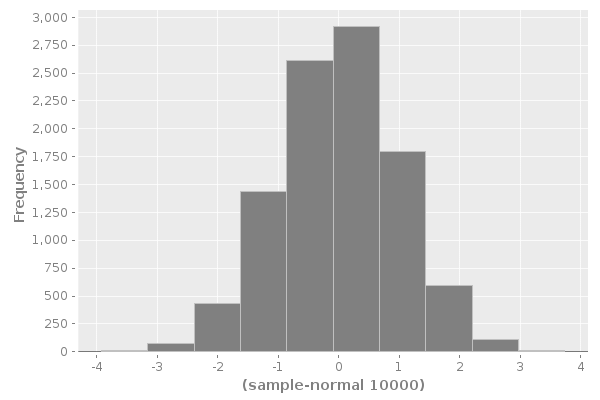

In [66]:
(require '[clojupyter.misc.helper :as helper])
(helper/add-dependencies '[incanter "1.5.7"])

(use '(incanter stats charts))
(-> (sample-normal 10000)
    histogram
    (.createBufferedImage 600 400))


If you're interested in the concept of a language like Clojure but
hosted on Python instead (so that you can use all of Python's great
libraries), see: [Hy](http://hylang.org/).

## Building a Project

To see how easy it is to build/package a project, try the following commands in your terminal:

```bash
make bash
cd projects
# To start a new project
lein new app my-app
cd my-app
# Run the app
lein run
# Package the app (including dependencies)
lein uberjar
# Run the packaged app (on any machine with java)
java -jar target/uberjar/my-app-0.1.0-SNAPSHOT-standalone.jar
```

## Web Development

The most out-of-the-box Clojure web dev library is [Luminus](http://www.luminusweb.net/).

Luminus (like many Clojure web-dev libraries) is based on [Ring](https://github.com/ring-clojure/ring). Ring takes a functional view of web-applications: an app is just a function for converting a **request** (represented as a map) into a **response** (also represented as a map). In this model, testing is easy (just call your application function with a fake response map), applications are server-agnostic (as long as the server can produce request maps and serve response maps), and middleware can be implemented as higher-order functions that operate on your application:

```clojure
(def app
  (-> my-request-handler
      middleware-a
      middleware-b)
```

[Hiccup](https://github.com/weavejester/hiccup) is also a popular Clojure(Script) library for generating HTML from Clojure data-structures, which makes it easy to use all of the existing tools for processing Clojure data-structures generating/manipulating the DOM structure.

Modern JS libraries (particularly React) see an app's view as a function of the application state: `view = f(state)`. This aligns with a functional programming approach, which has led to the development of ClojureScript libraries based on React. Most notably [Om](https://github.com/omcljs/om) and [Reagent](https://github.com/reagent-project/reagent).

The reagent-demo project provided in this Notebook's repository also provides a demonstration of how live-reloading streamlines JavaScript development. Start it by:

```bash
make bash
cd projects/reagent-demo
# Run the Ring web-app (see files in src/clj/reagent_demo)
lein run
# Run the live-reloading server (do this in a separate terminal)
lein figwheel
```

Then, open the app at [http://localhost:3000](http://localhost:3000), make a change in `src/cljs/reagent_demo/core.cljs`, and see it take immediate effect (though state atoms defined with `defonce` are not affected).

For a really awesome example of live-reloading, see: https://www.youtube.com/watch?v=KZjFVdU8VLI